In [1]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

# Problema: Dataset de pingüinos:

In [2]:
df = sns.load_dataset('penguins')

In [46]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset?

In [5]:
species_type = df['species'].unique()

print(f"Hay {len(species_type)} especies diferentes de pingüinos:")
print(", ".join(species_type))

Hay 3 especies diferentes de pingüinos:
Adelie, Chinstrap, Gentoo


2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

In [6]:
adelie_bill_length = df[df['species']=='Adelie']['bill_length_mm'].dropna()

adelie_bill_length_average = np.average(adelie_bill_length)

print(f"La longitud media del pico de los Adelies es {(adelie_bill_length_average):.3f} mm")

La longitud media del pico de los Adelies es 38.791 mm


3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?


In [7]:
gentoo_mass = df[df['species']=='Gentoo']['body_mass_g'].dropna()

gentoo_mass_average = np.average(gentoo_mass)

print(f"La masa promedio de los Gentoo es {gentoo_mass_average:.3f} g")

La masa promedio de los Gentoo es 5076.016 g


4. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?


In [8]:
bill_length = df['bill_length_mm'].dropna()

body_mass = df['body_mass_g'].dropna()


Correlación entre la longitud del pico y la masa corporal: 0.595


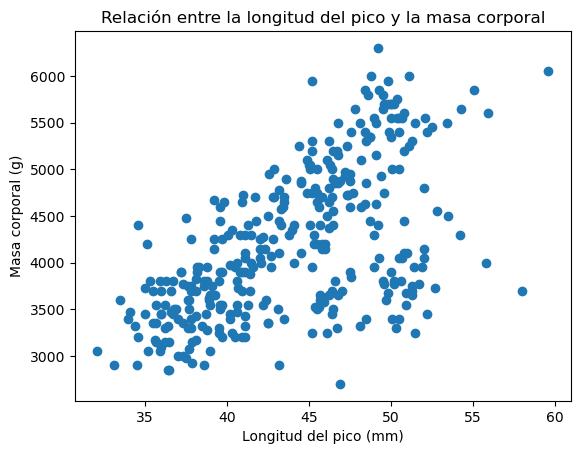

In [9]:
print(f"Correlación entre la longitud del pico y la masa corporal: {bill_length.corr(body_mass):.3f}")

plt.scatter(bill_length, body_mass)
plt.title('Relación entre la longitud del pico y la masa corporal')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.show()

5. ¿Cuál es la isla con mayor número de pingüinos en el dataset?

In [10]:
island_type = df['island'].value_counts()

island_max = island_type.idxmax()
num_penguis_max = island_type.max()

print(f"La isla con más pinguinos es {(island_max)}")

La isla con más pinguinos es Biscoe


6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?


In [11]:
flipper_length_chinstrap = df[df['species']=='Chinstrap']['flipper_length_mm'].dropna()

flipper_length_chinstrap_std = np.std(flipper_length_chinstrap)

print(f"La desviación estándar de la longitud de la aleta de los pingüinos Chinstrap es {flipper_length_chinstrap_std:.3f} mm.")


La desviación estándar de la longitud de la aleta de los pingüinos Chinstrap es 7.079 mm.


7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [12]:
max_bill_length_idx = df['bill_length_mm'].idxmax()

print(f"El pingüino con el pico más largo es de la especie {df.loc[max_bill_length_idx, 'species']} "
      f"y su pico mide {df.loc[max_bill_length_idx, 'bill_length_mm']:.2f} mm.")

El pingüino con el pico más largo es de la especie Gentoo y su pico mide 59.60 mm.


8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?


In [15]:
adelie_penguins = df[df['species'] == 'Adelie']

adelie_male = adelie_penguins[adelie_penguins['sex']=='Male'].shape[0]
adelie_female = adelie_penguins[adelie_penguins['sex']=='Female'].shape[0]

proportion = adelie_male/adelie_female

print(f"La proporción de machos y hembras en la especie Adelie es {proportion:.1f}")
print(f"Pingüinos Adelie machos:{adelie_male}")
print(f"Pingüinas Adelie hembras:{adelie_female}")

La proporción de machos y hembras en la especie Adelie es 1.0
Pingüinos Adelie machos:73
Pingüinas Adelie hembras:73


9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?


In [27]:
bill_length_adelie = df[df['species']=='Adelie']['bill_length_mm'].dropna()
bill_length_chinstrap = df[df['species']=='Chinstrap']['bill_length_mm'].dropna()
bill_length_gentoo = df[df['species']=='Gentoo']['bill_length_mm'].dropna()


body_mass_adelie = df[df['species']=='Adelie']['body_mass_g'].dropna()
body_mass_chinstrap = df[df['species']=='Chinstrap']['body_mass_g'].dropna()
body_mass_gentoo  = df[df['species']=='Gentoo']['body_mass_g'].dropna()

print(f"Correlación entre la longitud del pico y la masa corporal (Adelie): {bill_length_adelie.corr(body_mass_adelie ):.3f}")
print(f"Correlación entre la longitud del pico y la masa corporal (Chinstrap): {bill_length_chinstrap.corr(body_mass_chinstrap):.3f}")
print(f"Correlación entre la longitud del pico y la masa corporal (Gentoo): {bill_length_gentoo.corr(body_mass_gentoo):.3f}")



Correlación entre la longitud del pico y la masa corporal (Adelie): 0.549
Correlación entre la longitud del pico y la masa corporal (Chinstrap): 0.514
Correlación entre la longitud del pico y la masa corporal (Gentoo): 0.669


La correlación entre la longitud del pico y la masa corporal varía entre las especies de pingüinos, pero en general es moderada. Esto significa que, en promedio, los pingüinos con picos más largos tienden a tener una mayor masa corporal. Sin embargo, la fuerza de esta relación difiere ligeramente entre las especies. En los pingüinos Gentoo, la correlación es más fuerte (0.669), mientras que en los Adelie (0.549) y Chinstrap (0.514) es moderada.

10. ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

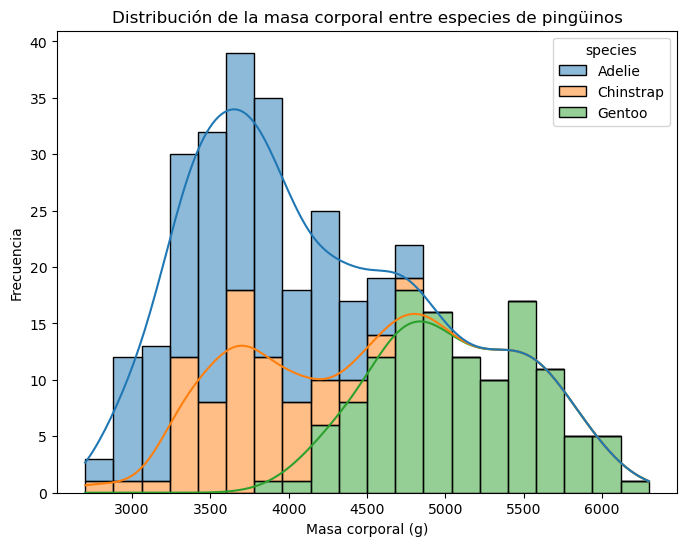

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='body_mass_g', hue='species', kde=True, multiple='stack', bins=20)
plt.title('Distribución de la masa corporal entre especies de pingüinos')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')
plt.show()

11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?


In [62]:
print('Longitud de la aleta (mm):')
df.groupby('species')['flipper_length_mm'].agg(['min', 'max'])

Longitud de la aleta (mm):


,min,max
species,,
Adelie,172.0,210.0
Chinstrap,178.0,212.0
Gentoo,203.0,231.0


12. ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

In [54]:
body_mass_5000 = df[df['body_mass_g']>5000]

print(f"{body_mass_5000.shape[0]} tienen la masa corporal superior a 5000 gramos")

61 tienen la masa corporal superior a 5000 gramos


13. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [70]:
print('Longitud del pico (mm):')
df.groupby(['species','island'])['bill_length_mm'].agg(['mean','std'])

Longitud del pico (mm):


mean       std
species   island                        
Adelie    Biscoe     38.975000  2.480916
          Dream      38.501786  2.465359
          Torgersen  38.950980  3.025318
Chinstrap Dream      48.833824  3.339256
Gentoo    Biscoe     47.504878  3.081857

14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?


In [81]:
flipper_length = df[df['species']=='Gentoo']['flipper_length_mm'].dropna()

body_mass_g_gentoo = df[df['species']=='Gentoo']['body_mass_g'].dropna()

Correlación entre la longitud de la aleta y la masa corporal de los Gentoo: 0.703


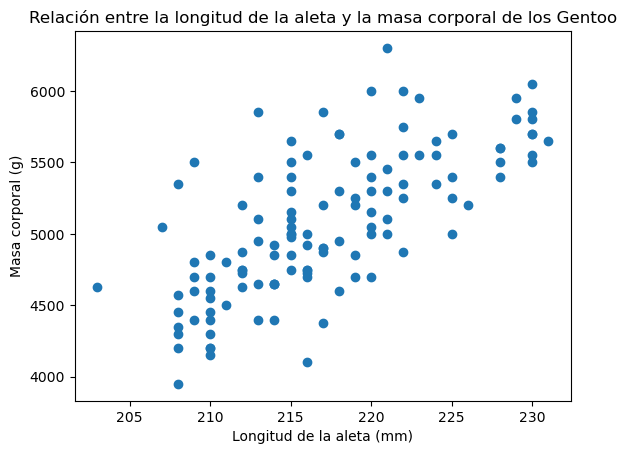

In [82]:
print(f"Correlación entre la longitud de la aleta y la masa corporal de los Gentoo: {flipper_length.corr(body_mass_g_gentoo):.3f}")

plt.scatter(flipper_length, body_mass_g_gentoo)
plt.title('Relación entre la longitud de la aleta y la masa corporal de los Gentoo')
plt.xlabel('Longitud de la aleta (mm)')
plt.ylabel('Masa corporal (g)')
plt.show()

15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?

In [87]:
num_missing_data_penguins = df[df.isnull().any(axis=1)].shape[0]

print(f"{num_missing_data_penguins} pingüinos tienen datos faltantes en alguna de sus características")


11 pingüinos tienen datos faltantes en alguna de sus características


16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [90]:
island_with_max_variation = df.dropna(subset=['bill_length_mm']).groupby('island')['bill_length_mm'].std().idxmax()

print(f"La isla con la mayor variación en la longitud del pico es {island_with_max_variation}")

La isla con la mayor variación en la longitud del pico es Dream


17. ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?


In [99]:
chinstrap_penguins = df[(df['species'] == 'Chinstrap') & df['body_mass_g'] & df['sex']]

avg_body_mass_sex = chinstrap_penguins.groupby('sex')['body_mass_g'].mean()

difference = abs(avg_body_mass_sex['Male'] - avg_body_mass_sex['Female'])

print(f"La diferencia en la masa corporal promedio entre machos y hembras de la especie Chinstrap es {difference:.2f} g")


La diferencia en la masa corporal promedio entre machos y hembras de la especie Chinstrap es 411.76 g


18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?


In [102]:
flipper_length_species_average = df.groupby('species')['flipper_length_mm'].mean()

flipper_length_species_average_max = flipper_length_species_average.idxmax()
flipper_length_average_max = flipper_length_species_average.max()

print(f"La especie con la longitud de aleta promedio más alta es {flipper_length_species_average_max} "
      f"con una longitud de {flipper_length_average_max:.2f} mm")


La especie con la longitud de aleta promedio más alta es Gentoo con una longitud de 217.19 mm


19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?

In [104]:
bill_length_min = df.loc[df['bill_length_mm'].idxmin(), ['species', 'bill_length_mm']]

print(f"La especie con la longitud del pico más pequeña es {bill_length_min['species']} "
      f"con una longitud de {bill_length_min['bill_length_mm']:.2f} mm.")


La especie con la longitud del pico más pequeña es Adelie con una longitud de 32.10 mm.


20. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?


In [114]:
adelie_penguins = df[(df['species'] == 'Adelie') & df['flipper_length_mm'].notnull() & df['sex']]
avg_flipper_length_sex = adelie_penguins.groupby('sex')['flipper_length_mm'].mean()

print('Longitud de la aleta(mm):')
avg_flipper_length_sex

Longitud de la aleta(mm):


sex
Female    187.794521
Male      192.410959
Name: flipper_length_mm, dtype: float64